In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline



In [ ]:
a=1

In [ ]:
df=pd.read_csv('/Users/ranmo/Desktop/数据分析案例/酒店客户预定流失情况/userlostprob.txt',sep='\t')
df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
label                               689945 non-null int64
sampleid                            689945 non-null int64
d                                   689945 non-null object
arrival                             689945 non-null object
iforderpv_24h                       689945 non-null int64
decisionhabit_user                  385450 non-null float64
historyvisit_7ordernum              82915 non-null float64
historyvisit_totalordernum          386525 non-null float64
hotelcr                             689148 non-null float64
ordercanceledprecent                447831 non-null float64
landhalfhours                       661312 non-null float64
ordercanncelednum                   447831 non-null float64
commentnums                         622029 non-null float64
starprefer                          464892 non-null float64
novoters                            672918 non-null float6

In [7]:
df.label.value_counts()

0    500588
1    189357
Name: label, dtype: int64

In [8]:
df.isnull().mean()

label                               0.000000
sampleid                            0.000000
d                                   0.000000
arrival                             0.000000
iforderpv_24h                       0.000000
decisionhabit_user                  0.441332
historyvisit_7ordernum              0.879824
historyvisit_totalordernum          0.439774
hotelcr                             0.001155
ordercanceledprecent                0.350918
landhalfhours                       0.041500
ordercanncelednum                   0.350918
commentnums                         0.098437
starprefer                          0.326190
novoters                            0.024679
consuming_capacity                  0.327719
historyvisit_avghotelnum            0.437816
cancelrate                          0.016984
historyvisit_visit_detailpagenum    0.554698
delta_price1                        0.366405
price_sensitive                     0.327719
hoteluv                             0.001155
businessra

In [9]:
df_d=df.d.value_counts().to_frame().reset_index()
df_arrival=df.arrival.value_counts().to_frame().reset_index()
time_table=df_d.merge(df_arrival,how='outer',on='index')
time_table.fillna(0,inplace=True)
time_table.set_index('index',inplace=True)
time_table.sort_index(inplace=True)

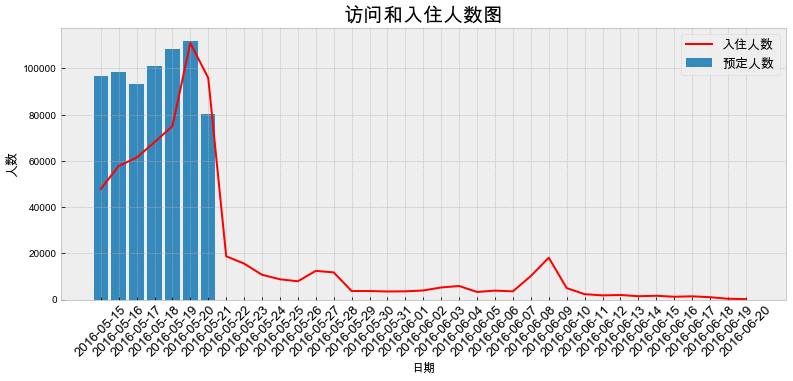

In [13]:
x=time_table.index
y1=time_table.arrival
y2=time_table.d

plt.figure(figsize=(13,5))
plt.style.use('bmh')
plt.plot(x,y1,c="r",label='入住人数');
plt.bar(x,y2,align="center",label='预定人数');
plt.title('访问和入住人数图',fontsize=20)
plt.xticks(rotation=45,fontsize=13)
plt.xlabel('日期');
plt.ylabel('人数',fontsize=13);
plt.legend(fontsize=13)

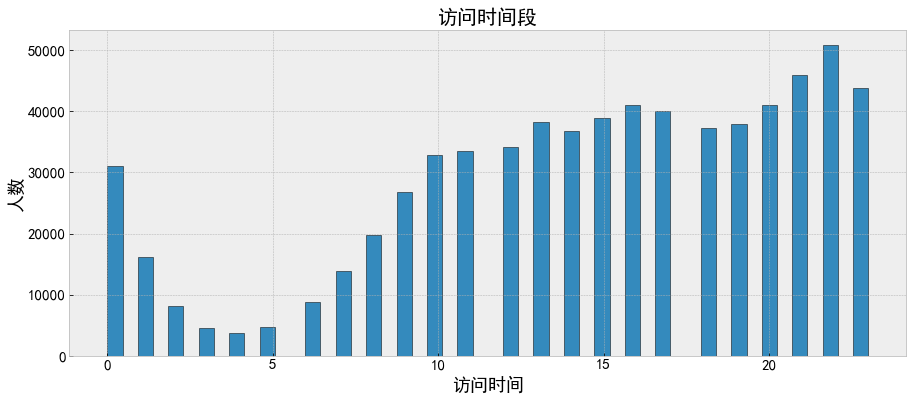

In [125]:
plt.figure(figsize=(15, 6))
plt.hist(df.h.dropna(), bins = 50, edgecolor = 'k');
#因为最多24个时段，所以bins再大的话，只是调整方块的间距了
plt.title('访问时间段',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('访问时间',fontsize=18); 
plt.ylabel('人数',fontsize=18); 

Text(0.5, 1.0, '客户价值')

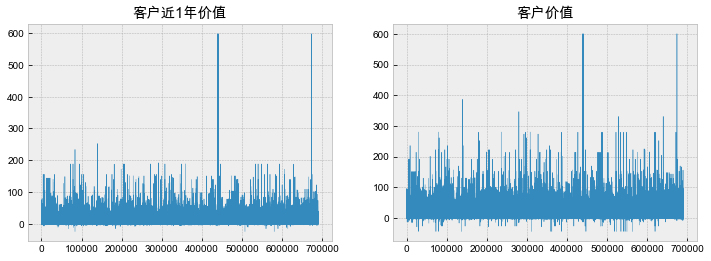

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(df.index,df.customer_value_profit,linewidth=0.5)
plt.title('客户近1年价值')

plt.subplot(122)
plt.plot(df.index,df.ctrip_profits,linewidth=0.5)
plt.title('客户价值')

Text(0.5, 1.0, '消费能力指数图')

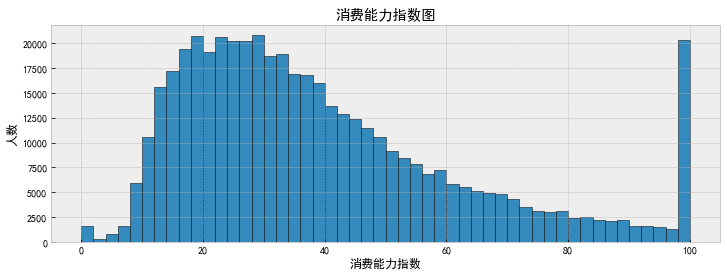

In [140]:
plt.figure(figsize=(12, 4))

plt.hist(df.consuming_capacity,bins=50,edgecolor='k')
plt.xlabel('消费能力指数')
plt.ylabel('人数')
plt.title('消费能力指数图')

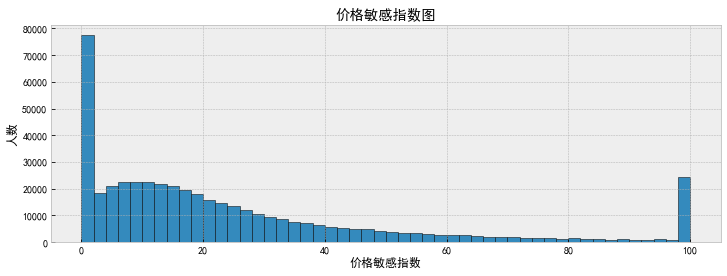

In [141]:

plt.figure(figsize=(12, 4))

plt.hist(df['price_sensitive'].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('价格敏感指数'); 
plt.ylabel('人数'); 
plt.title('价格敏感指数图');

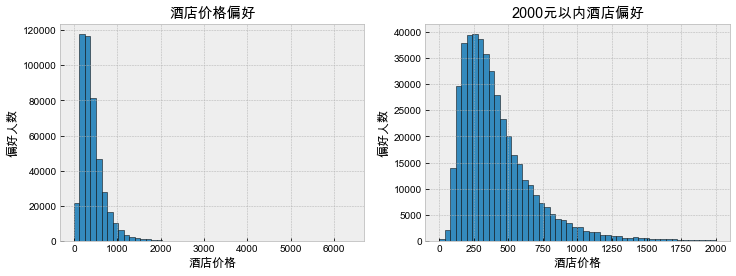

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(df.avgprice.dropna(),bins=50,edgecolor = 'k')
plt.xlabel('酒店价格'); 
plt.ylabel('偏好人数'); 
plt.title('酒店价格偏好');

plt.subplot(122)
plt.hist(df[df.avgprice<2000]['avgprice'].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('酒店价格'); 
plt.ylabel('偏好人数'); 
plt.title('2000元以内酒店偏好');

Text(0.5, 1.0, '酒店星级偏好')

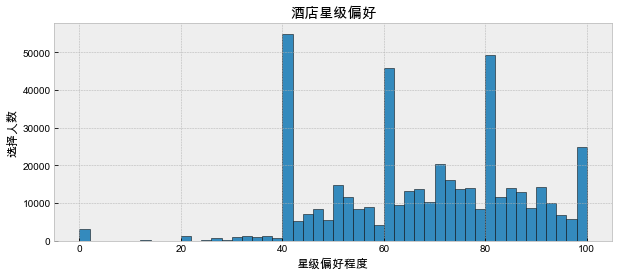

In [16]:
plt.figure(figsize=(10, 4))
plt.hist(df.starprefer.dropna(), bins = 50, edgecolor = 'k')
plt.xlabel('星级偏好程度')
plt.ylabel('选择人数');
plt.title('酒店星级偏好')

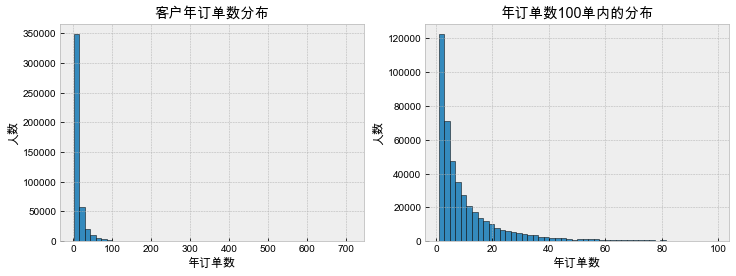

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(df.ordernum_oneyear.dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('年订单数'); 
plt.ylabel('人数'); 
plt.title('客户年订单数分布');

plt.subplot(122)
plt.hist(df[df.ordernum_oneyear<100].ordernum_oneyear.dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('年订单数'); 
plt.ylabel('人数'); 
plt.title('年订单数100单内的分布');

Text(0.5, 1.0, '订单取消率')

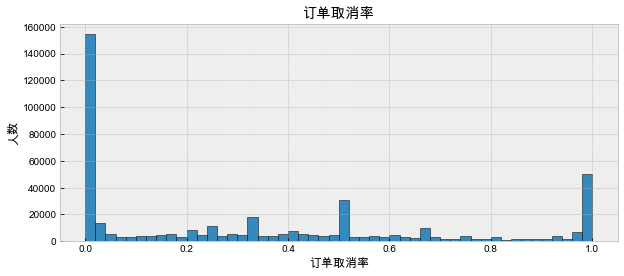

In [18]:
plt.figure(figsize=(10, 4))
plt.hist(df.ordercanceledprecent.dropna(),bins=50,edgecolor = 'k')
plt.xlabel('订单取消率')
plt.ylabel('人数')
plt.title('订单取消率')

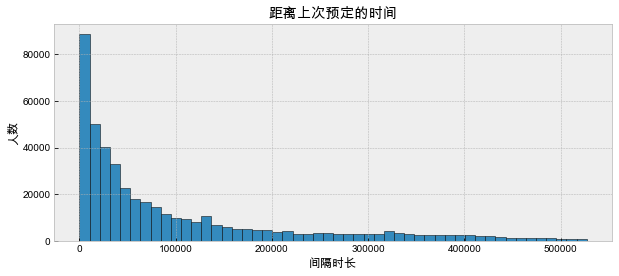

In [19]:
plt.figure(figsize=(10, 4))
plt.hist(df.lasthtlordergap.dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('间隔时长'); plt.ylabel('人数'); 
plt.title('距离上次预定的时间');

/Users/ranmo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ranmo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '新老客户中的客户流失率')

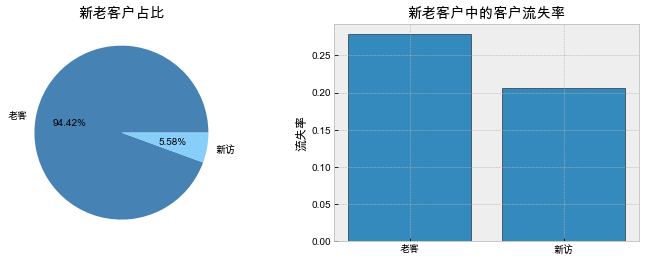

In [21]:
s_table=df[['label','sid']]
s_table['sid']=np.where(s_table['sid']==1,1,0)
s_table['flag']=1
s=s_table.groupby('sid').sum().reset_index()
s['rate']=s['label']/s['flag']                       # flag求和刚好是sid为0和1的个数，label求和刚好是流失人数，相除则为流失率

plt.figure(figsize=(12, 4))
plt.subplot(121)
percent=[s['flag'][0]/s['flag'].sum(),s['flag'][1]/s['flag'].sum()]
color=['steelblue','lightskyblue']
label=['老客','新访']
plt.pie(percent,autopct='%.2f%%',labels=label,colors=color)
plt.title('新老客户占比')

plt.subplot(122)
plt.bar(s.sid,s.rate,align='center',tick_label=label,edgecolor = 'k')
plt.ylabel('流失率')
plt.title('新老客户中的客户流失率')

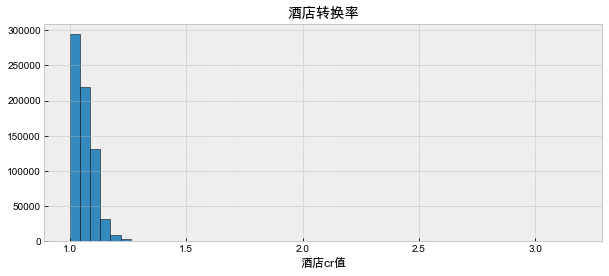

In [22]:
plt.figure(figsize=(10, 4))
plt.hist(df.hotelcr.dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('酒店cr值');  
plt.title('酒店转换率');

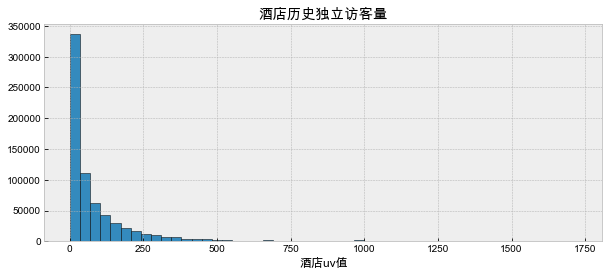

In [23]:
plt.figure(figsize=(10, 4))
plt.hist(df.hoteluv.dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('酒店uv值');  
plt.title('酒店历史独立访客量');

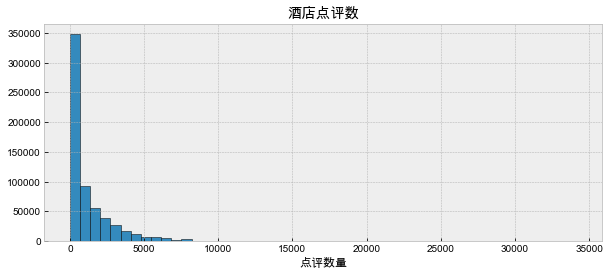

In [24]:
plt.figure(figsize=(10, 4))
plt.hist(df.commentnums.dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('点评数量');  
plt.title('酒店点评数');

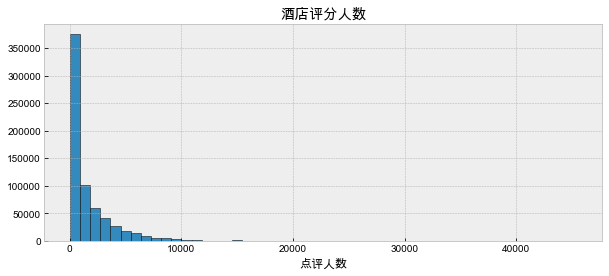

In [25]:
plt.figure(figsize=(10, 4))
plt.hist(df.novoters.dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('点评人数');  
plt.title('酒店评分人数');

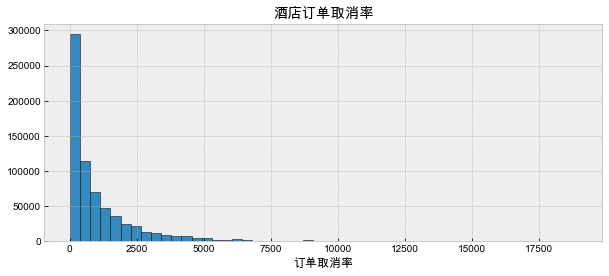

In [26]:
plt.figure(figsize=(10, 4))
plt.hist(df.cancelrate.dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('订单取消率');  
plt.title('酒店订单取消率');

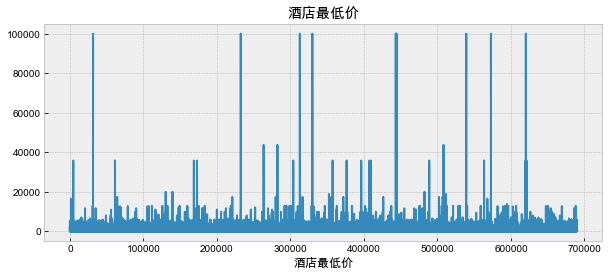

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(df.lowestprice.dropna())
plt.xlabel('酒店最低价');  
plt.title('酒店最低价');

In [167]:
# 为了避免在原数据集上进行修改操作，我们将df复制一份
df1=df.copy()

In [168]:
## 增加列
# 将两个日期变量由字符串转换为日期型格式
df1['arrival']=pd.to_datetime(df1['arrival'])
df1['d']=pd.to_datetime(df1['d'])
# 生成提前预定时间列
df1['day_advanced']=(df1['arrival']-df1['d']).dt.days

## 删除列
df1=df1.drop(['d','arrival'],axis=1)

In [169]:
df1.head().day_advanced

0    0
1    0
2    1
3    0
4    1
Name: day_advanced, dtype: int64

In [170]:
filter1=['customer_value_profit','ctrip_profits']
filter2=['delta_price1','delta_price2','lowestprice']

for i in filter1:
    df1.loc[df1[i]<0,i]=0        ##用df1.loc[df1[i]<0][i]=0 会提示无法有点问题，所以还是得用前面的用法
    
for i in filter2:
    temp=df.delta_price1.mean()
    df1.loc[df1[i]<0,i]=temp    ##用df1.loc[df1[i]<0][i]=0 会提示无法有点问题，所以还是得用前面的用法


In [171]:
df1[['customer_value_profit','ctrip_profits','delta_price1','delta_price2','lowestprice']].describe()

,customer_value_profit,ctrip_profits,delta_price1,delta_price2,lowestprice
count,439123.000000,445187.000000,437146.000000,437750.000000,687931.000000
mean,3.052456,4.230381,184.988343,169.043761,318.806361
std,6.616664,9.295756,220.769379,207.223789,575.782357
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.269000,0.340000,79.067012,79.067012,116.000000
50%,0.991000,1.347000,81.000000,79.067012,200.000000
75%,3.138000,4.320000,226.000000,198.000000,380.000000
max,598.064000,600.820000,5398.000000,5114.000000,100000.000000


In [172]:
# 删除缺失值比例大于80%的行和列
print('删除空值前数据维度是:{}'.format(df1.shape))

df1.dropna(axis=0,thresh=df1.shape[1]*0.2,inplace=True)
df1.dropna(axis=1,thresh=df1.shape[0]*0.2,inplace=True)
print('删除空值后数据维度是:{}'.format(df1.shape))

删除空值前数据维度是:(689945, 50)
删除空值后数据维度是:(689870, 49)


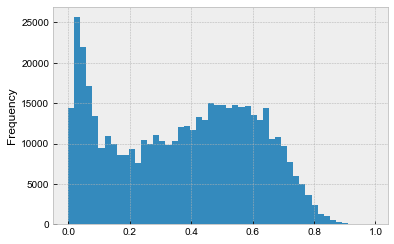

In [100]:
df1.businessrate_pre.plot(kind='hist',bins=50)

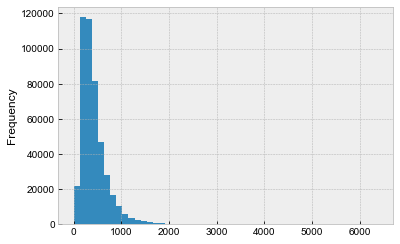

In [103]:
df1.avgprice.plot(kind='hist',bins=50)

In [173]:
filter_mean=['businessrate_pre2','cancelrate_pre','businessrate_pre']
for i in df1.columns:
    if i in filter_mean:
        df1[i].fillna(df1[i].mean(),inplace=True)
    else:
        df1[i].fillna(df1[i].median(),inplace=True)

In [174]:
for i in df1.columns:
    df1.loc[df1[i]<np.percentile(df1[i],1),i]=np.percentile(df1[i],1)
    df1.loc[df1[i]>np.percentile(df1[i],99),i]=np.percentile(df1[i],99)

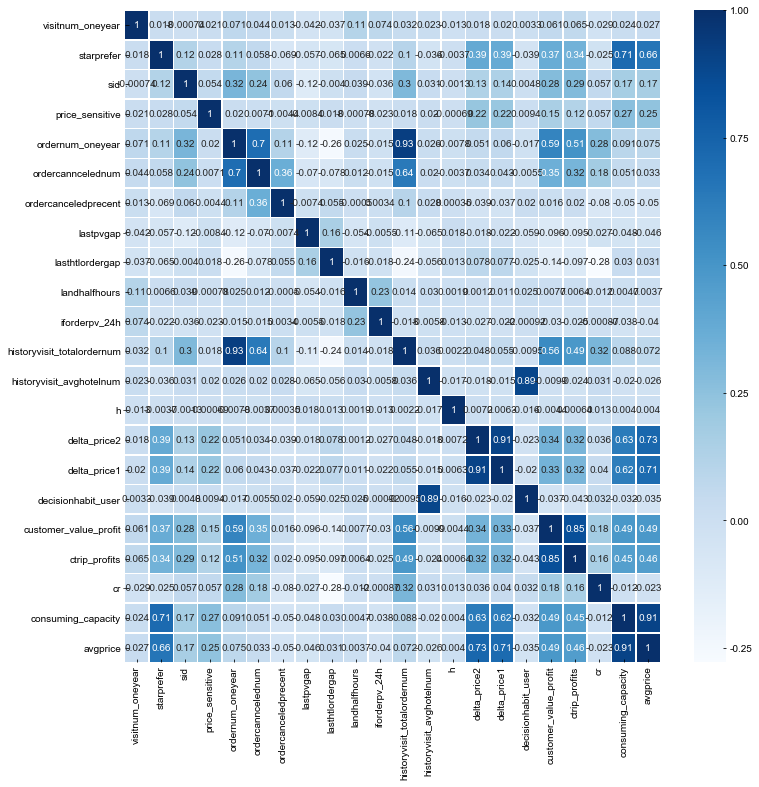

In [117]:
# 用户特征提取(分两次提取)
user_features=['visitnum_oneyear','starprefer','sid','price_sensitive','ordernum_oneyear','ordercanncelednum','ordercanceledprecent','lastpvgap',
               'lasthtlordergap','landhalfhours','iforderpv_24h','historyvisit_totalordernum','historyvisit_avghotelnum','h',
               'delta_price2','delta_price1','decisionhabit_user','customer_value_profit','ctrip_profits','cr','consuming_capacity','avgprice']
# 生成用户特征的相关性矩阵
corr_mat=df1[user_features].corr()

# 绘制用户特征的相关性矩阵热度图
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')

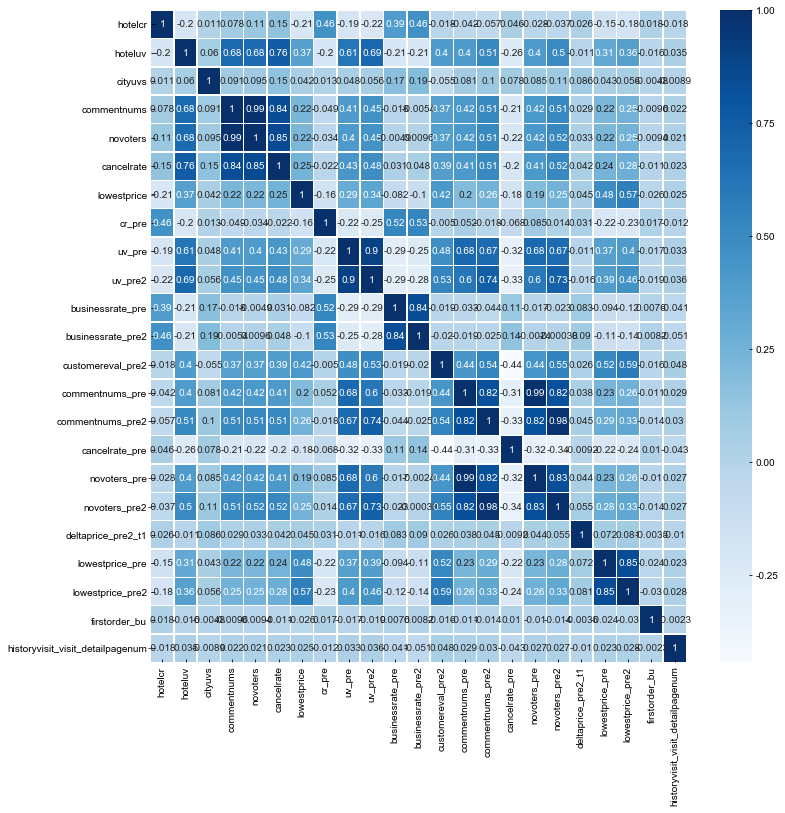

In [119]:
# 用户特征提取(分两次提取)
user_features=['hotelcr','hoteluv','cityuvs','commentnums','novoters','cancelrate','lowestprice','cr_pre','uv_pre','uv_pre2','businessrate_pre',
                'businessrate_pre2','customereval_pre2','commentnums_pre','commentnums_pre2','cancelrate_pre','novoters_pre','novoters_pre2',
                'deltaprice_pre2_t1','lowestprice_pre','lowestprice_pre2','firstorder_bu','historyvisit_visit_detailpagenum']
# 生成用户特征的相关性矩阵
corr_mat=df1[user_features].corr()

# 绘制用户特征的相关性矩阵热度图
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')

In [175]:
c_value=['customer_value_profit','ctrip_profits']                   # 用户价值
consume_level=['avgprice','consuming_capacity']                     # 用户消费水平
price_prefer=['delta_price1','delta_price2']                        # 用户偏好价格
hotel_hot=['commentnums','novoters']                                # 酒店热度
hotel_hot_pre=['commentnums_pre','novoters_pre']                    # 24小时内浏览次数最多的酒店热度
hotel_hot_pre2=['commentnums_pre2','novoters_pre2']                 # 24小时内浏览酒店的平均热度

from sklearn.decomposition import PCA
pca=PCA(n_components=1)
df1['c_value']=pca.fit_transform(df1[c_value])
df1['consume_level']=pca.fit_transform(df1[consume_level])
df1['price_prefer']=pca.fit_transform(df1[price_prefer])
df1['hotel_hot']=pca.fit_transform(df1[hotel_hot])
df1['hotel_hot_pre']=pca.fit_transform(df1[hotel_hot_pre])
df1['hotel_hot_pre2']=pca.fit_transform(df1[hotel_hot_pre2])

df1.drop(c_value,axis=1,inplace=True)
df1.drop(consume_level,axis=1,inplace=True)
df1.drop(price_prefer,axis=1,inplace=True)
df1.drop(hotel_hot,axis=1,inplace=True)
df1.drop(hotel_hot_pre,axis=1,inplace=True)
df1.drop(hotel_hot_pre2,axis=1,inplace=True)
df1.drop('historyvisit_totalordernum',axis=1,inplace=True)  ###把重复的一列删了
df1.drop('sampleid',axis=1,inplace=True)   ###把id列删了

In [176]:
print('PCA降维后数据维度是：{}'.format(df1.shape))

PCA降维后数据维度是：(689870, 41)


In [177]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

y=df1['label']
x=df1.drop('label',axis=1)

scaler = StandardScaler()
X= scaler.fit_transform(x)   #先用fit求得训练数据的标准差和均值,再用transform将数据转化成

In [178]:
from sklearn import model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size= 0.2,random_state=1)

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

lr = LogisticRegression()                                        # 实例化一个LR模型
lr.fit(X_train,y_train)                                          # 训练模型
y_prob = lr.predict_proba(X_test)[:,1]                           # 预测1类的概率
y_pred = lr.predict(X_test)                                      # 模型对测试集的预测结果
fpr_lr,tpr_lr,threshold_lr = metrics.roc_curve(y_test,y_prob)    # 获取真阳率、伪阳率、阈值
auc_lr = metrics.auc(fpr_lr,tpr_lr)                              # AUC得分
score_lr = metrics.accuracy_score(y_test,y_pred)                 # 模型准确率


print('模型准确率为:{0},AUC得分为:{1}'.format(score_lr,auc_lr))
print('  ')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


模型准确率为:0.7372838360850595,AUC得分为:0.7018986837301519
  
              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84     99921
         1.0       0.59      0.16      0.25     38053

   micro avg       0.74      0.74      0.74    137974
   macro avg       0.67      0.56      0.55    137974
weighted avg       0.70      0.74      0.68    137974



In [180]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

gnb = GaussianNB()                                                # 实例化一个LR模型
gnb.fit(X_train,y_train)                                          # 训练模型
y_prob = gnb.predict_proba(X_test)[:,1]                           # 预测1类的概率
y_pred = gnb.predict(X_test)                                      # 模型对测试集的预测结果
fpr_gnb,tpr_gnb,threshold_gnb = metrics.roc_curve(y_test,y_prob)    # 获取真阳率、伪阳率、阈值
auc_gnb = metrics.auc(fpr_gnb,tpr_gnb)                              # AUC得分
score_gnb = metrics.accuracy_score(y_test,y_pred)                 # 模型准确率


print('模型准确率为:{0},AUC得分为:{1}'.format(score_gnb,auc_gnb))
print('  ')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))


模型准确率为:0.6389464681751634,AUC得分为:0.6686812241618846
  
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73     99921
         1.0       0.40      0.59      0.47     38053

   micro avg       0.64      0.64      0.64    137974
   macro avg       0.60      0.62      0.60    137974
weighted avg       0.69      0.64      0.66    137974



In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report

svc = SVC(kernel='rbf',C=1.0).fit(X_train,y_train)
y_prob = svc.decision_function(X_test)                              # 决策边界距离
y_pred = svc.predict(X_test)                                        # 模型对测试集的预测结果
fpr_svc,tpr_svc,threshold_svc = metrics.roc_curve(y_test,y_prob)     # 获取真阳率、伪阳率、阈值
auc_svc = metrics.auc(fpr_svc,tpr_svc)                              # 模型准确率
score_svc = metrics.accuracy_score(y_test,y_pred)

print('模型准确率为:{0},AUC得分为:{1}'.format(score_gnb,auc_gnb))
print('  ')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

/Users/ranmo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
